In [2]:
import pandas as pd
import numpy as np

In [3]:
transactional_dataset = pd.read_csv('../data/bank/bs140513_032310.csv') 


In [12]:
transactional_dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [13]:
transactional_dataset.index

RangeIndex(start=0, stop=594643, step=1)

In [14]:
transactional_dataset.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [15]:
selected_list_grouped = transactional_dataset.groupby(['category','gender'])
selected_list_grouped = selected_list_grouped.agg({'gender':'count'})
selected_list_grouped.head()

gender
category                gender        
'es_barsandrestaurants' 'E'         14
                        'F'       3538
                        'M'       2818
                        'U'          3
'es_contents'           'E'          4

In [16]:
selected_list_grouped.index

MultiIndex(levels=[[''es_barsandrestaurants'', ''es_contents'', ''es_fashion'', ''es_food'', ''es_health'', ''es_home'', ''es_hotelservices'', ''es_hyper'', ''es_leisure'', ''es_otherservices'', ''es_sportsandtoys'', ''es_tech'', ''es_transportation'', ''es_travel'', ''es_wellnessandbeauty''], [''E'', ''F'', ''M'', ''U'']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14], [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 0, 1, 2, 3]],
           names=['category', 'gender'])

In [17]:
selected_list_grouped.columns

Index(['gender'], dtype='object')

In [18]:
selected_list_grouped.at[("'es_barsandrestaurants'","'M'"),'gender']

2818

In [19]:
selected_list_grouped.index.get_level_values('gender')

Index([''E'', ''F'', ''M'', ''U'', ''E'', ''F'', ''M'', ''E'', ''F'', ''M'',
       ''U'', ''E'', ''F'', ''M'', ''U'', ''E'', ''F'', ''M'', ''U'', ''E'',
       ''F'', ''M'', ''U'', ''E'', ''F'', ''M'', ''E'', ''F'', ''M'', ''U'',
       ''E'', ''F'', ''M'', ''E'', ''F'', ''M'', ''E'', ''F'', ''M'', ''E'',
       ''F'', ''M'', ''U'', ''E'', ''F'', ''M'', ''U'', ''F'', ''M'', ''E'',
       ''F'', ''M'', ''U''],
      dtype='object', name='gender')

In [20]:
selected_list_grouped.loc[selected_list_grouped.index.get_level_values('gender')=="'M'"]

,,gender
category,gender,
'es_barsandrestaurants','M',2818
'es_contents','M',435
'es_fashion','M',2824
'es_food','M',11843
'es_health','M',6778
'es_home','M',859
'es_hotelservices','M',734
'es_hyper','M',2736
'es_leisure','M',176


In [21]:
selected_list_grouped[(selected_list_grouped.index.get_level_values('gender')=="'M'") & (selected_list_grouped.index.get_level_values('category')=="'es_food'")].iat[0,0]

11843

In [22]:
selected_list_grouped_male = selected_list_grouped.loc[selected_list_grouped.index.get_level_values('gender')=="'M'"]
selected_list_grouped_female = selected_list_grouped.loc[selected_list_grouped.index.get_level_values('gender')=="'F'"]

In [23]:
selected_list_grouped_male.loc["'es_barsandrestaurants'":"'es_food'"].loc

In [24]:
selected_list_grouped_male_leveldrop = selected_list_grouped_male.index.droplevel('gender')

In [25]:
selected_list_grouped_male_leveldrop

Index([''es_barsandrestaurants'', ''es_contents'', ''es_fashion'', ''es_food'',
       ''es_health'', ''es_home'', ''es_hotelservices'', ''es_hyper'',
       ''es_leisure'', ''es_otherservices'', ''es_sportsandtoys'', ''es_tech'',
       ''es_transportation'', ''es_travel'', ''es_wellnessandbeauty''],
      dtype='object', name='category')

In [26]:

df = selected_list_grouped.loc["'es_barsandrestaurants'","'M'"].iat[0]
df

2818

In [27]:
for label, content in df.iteritems():
    print('label:', label)
    print('content:', content, sep='\n')

AttributeError: 'numpy.int64' object has no attribute 'iteritems'

In [38]:
table = pd.pivot_table(transactional_dataset, values=['amount'], index=['category'],
                     columns=['gender'])

In [39]:
table

amount                                      
gender                          'E'          'F'          'M'         'U'
category                                                                 
'es_barsandrestaurants'   22.391429    44.673392    42.047974   39.303333
'es_contents'             47.820000    45.368677    43.675609         NaN
'es_fashion'              82.951667    66.974729    63.927344   62.258333
'es_food'                 38.338438    37.283734    36.806356   36.720000
'es_health'              119.647174   139.376990   130.697524   98.782857
'es_home'                703.650000   166.309314   163.656892  134.185000
'es_hotelservices'       167.066250   223.333054   181.846049         NaN
'es_hyper'                63.237857    47.086363    44.521349   40.460000
'es_leisure'             462.970000   289.910373   286.094489         NaN
'es_otherservices'       207.490000   144.143254   125.272833         NaN
'es_sportsandtoys'       124.082500   228.373923   196.084254         NaN
'es_tech'                190.275714   124.629915   116.008726  115.160000
'es_transportation'       25.805405    26.958997    26.963646   26.172112
'es_travel'                     NaN  2311.343772  2148.254154         NaN
'es_wellnessandbeauty'    87.763600    67.986993    62.321063   26.960000

In [30]:
for label, content in table.iteritems():
    print('label:', label)
    print('content:', content, sep='\n')

label: ('amount', "'E'")
content:
category
'es_barsandrestaurants'     22.391429
'es_contents'               47.820000
'es_fashion'                82.951667
'es_food'                   38.338438
'es_health'                119.647174
'es_home'                  703.650000
'es_hotelservices'         167.066250
'es_hyper'                  63.237857
'es_leisure'               462.970000
'es_otherservices'         207.490000
'es_sportsandtoys'         124.082500
'es_tech'                  190.275714
'es_transportation'         25.805405
'es_travel'                       NaN
'es_wellnessandbeauty'      87.763600
Name: (amount, 'E'), dtype: float64
label: ('amount', "'F'")
content:
category
'es_barsandrestaurants'      44.673392
'es_contents'                45.368677
'es_fashion'                 66.974729
'es_food'                    37.283734
'es_health'                 139.376990
'es_home'                   166.309314
'es_hotelservices'          223.333054
'es_hyper'                   47.086

In [31]:
table.columns#table.loc["'es_barsandrestaurants'",'']

MultiIndex(levels=[['amount'], [''E'', ''F'', ''M'', ''U'']],
           codes=[[0, 0, 0, 0], [0, 1, 2, 3]],
           names=[None, 'gender'])

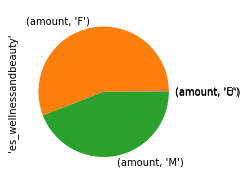

In [40]:
for index in table.index:
    for col in table.columns.get_level_values('gender'):
        if (index, col) in selected_list_grouped.index: #Das index Tupel (index,col) existiert
            table.at[index,('amount',col)] = selected_list_grouped.at[(index,col),'gender']
        else:
            table.at[index,('amount',col)] = 0.0

plot = table.loc[index].plot.pie(subplots=True, figsize=(100,3))

In [380]:
table.index

Index([''es_barsandrestaurants'', ''es_contents'', ''es_fashion'', ''es_food'',
       ''es_health'', ''es_home'', ''es_hotelservices'', ''es_hyper'',
       ''es_leisure'', ''es_otherservices'', ''es_sportsandtoys'', ''es_tech'',
       ''es_transportation'', ''es_travel'', ''es_wellnessandbeauty''],
      dtype='object', name='category')

In [353]:
table.at["'es_barsandrestaurants'",('amount',"'M'")]

42.047973740241325

In [76]:
selected_list = transactional_dataset.drop(['customer','step','age','merchant','zipMerchant', 'fraud','zipcodeOri','amount'],axis =1)

In [329]:
selected_list_grouped = selected_list.groupby(['category','gender'])
selected_list_grouped

In [94]:
selected_list_grouped = selected_list_grouped.agg({'gender':'count'})
selected_list_grouped

gender
category                gender        
'es_barsandrestaurants' 'E'         14
                        'F'       3538
                        'M'       2818
                        'U'          3
'es_contents'           'E'          4
                        'F'        446
                        'M'        435
'es_fashion'            'E'         12
                        'F'       3612
                        'M'       2824
                        'U'          6
'es_food'               'E'         64
                        'F'      14321
                        'M'      11843
                        'U'         26
'es_health'             'E'         46
                        'F'       9288
                        'M'       6778
                        'U'         21
'es_home'               'E'          2
                        'F'       1123
                        'M'        859
                        'U'          2
'es_hotelservices'      'E'          8
                        'F'       1002
                        'M'        734
'es_hyper'              'E'         14
                        'F'       3346
                        'M'       2736
                        'U'          2
'es_leisure'            'E'          1
                        'F'        322
                        'M'        176
'es_otherservices'      'E'          2
                        'F'        504
                        'M'        406
'es_sportsandtoys'      'E'          4
                        'F'       2442
                        'M'       1556
'es_tech'               'E'          7
                        'F'       1298
                        'M'       1060
                        'U'          5
'es_transportation'     'E'        975
                        'F'     274454
                        'M'     229245
                        'U'        445
'es_travel'             'F'        456
                        'M'        272
'es_wellnessandbeauty'  'E'         25
                        'F'       8413
                        'M'       6643
                        'U'          5

In [99]:
selected_list_grouped.T

category 'es_barsandrestaurants'                 'es_contents'            \
gender                       'E'   'F'   'M' 'U'           'E'  'F'  'M'   
gender                        14  3538  2818   3             4  446  435   

category 'es_fashion'              ... 'es_transportation'                  \
gender            'E'   'F'   'M'  ...                 'E'     'F'     'M'   
gender             12  3612  2824  ...                 975  274454  229245   

category      'es_travel'      'es_wellnessandbeauty'                  
gender    'U'         'F'  'M'                    'E'   'F'   'M' 'U'  
gender    445         456  272                     25  8413  6643   5  

[1 rows x 53 columns]

In [98]:
selected_list_grouped = selected_list_grouped.T
selected_list_grouped.set_index('gender').T

gender,14,3538,2818,3,4,446,435,12,3612,2824,...,975,274454,229245,445,456,272,25,8413,6643,5


In [44]:
grouped_by_age = transactional_dataset.groupby('gender')

In [45]:
grouped_by_age = grouped_by_age.agg({'gender': 'count'})

In [68]:
grouped_by_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 'E' to 'U'
Data columns (total 1 columns):
gender    4 non-null int64
dtypes: int64(1)
memory usage: 64.0+ bytes


In [69]:
grouped_by_age

,gender
gender,
'E',1178
'F',324565
'M',268385
'U',515


In [66]:
transactional_dataset.loc[transactional_dataset['gender'] == 'M']

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


In [29]:
transactional_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
step           594643 non-null int64
customer       594643 non-null object
age            594643 non-null object
gender         594643 non-null object
zipcodeOri     594643 non-null object
merchant       594643 non-null object
zipMerchant    594643 non-null object
category       594643 non-null object
amount         594643 non-null float64
fraud          594643 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [15]:
network_file = pd.read_csv('../data/bank/bsNET140513_032310.csv') 

In [19]:
network_file

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0
5,'C1315400589','M348934600',25.81,'es_transportation',0
6,'C765155274','M348934600',9.10,'es_transportation',0
7,'C202531238','M348934600',21.17,'es_transportation',0
8,'C105845174','M348934600',32.40,'es_transportation',0
9,'C39858251','M348934600',35.40,'es_transportation',0


In [16]:
network_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 5 columns):
Source       594643 non-null object
Target       594643 non-null object
Weight       594643 non-null float64
typeTrans    594643 non-null object
fraud        594643 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ MB


In [231]:
A = np.array([1.1, 1.1, 3.3, 3.3, 5.5, 6.6])
B = np.array([111, 222, 222, 333, 333, 777])
C = np.random.randint(10, 99, 6)
df = pd.DataFrame(zip(A, B, C), columns=['A', 'B', 'C'])
df.set_index(['A', 'B'], inplace=True)

In [232]:
df.columns

Index(['C'], dtype='object')

In [233]:
df.index

MultiIndex(levels=[[1.1, 3.3, 5.5, 6.6], [111, 222, 333, 777]],
           codes=[[0, 0, 1, 1, 2, 3], [0, 1, 1, 2, 2, 3]],
           names=['A', 'B'])

In [234]:
df.loc[(df.index.get_level_values('A') > 1.7)]

C
A   B      
3.3 222  44
    333  84
5.5 333  92
6.6 777  53

In [340]:
df.at[(3.3,333), 'C']

84

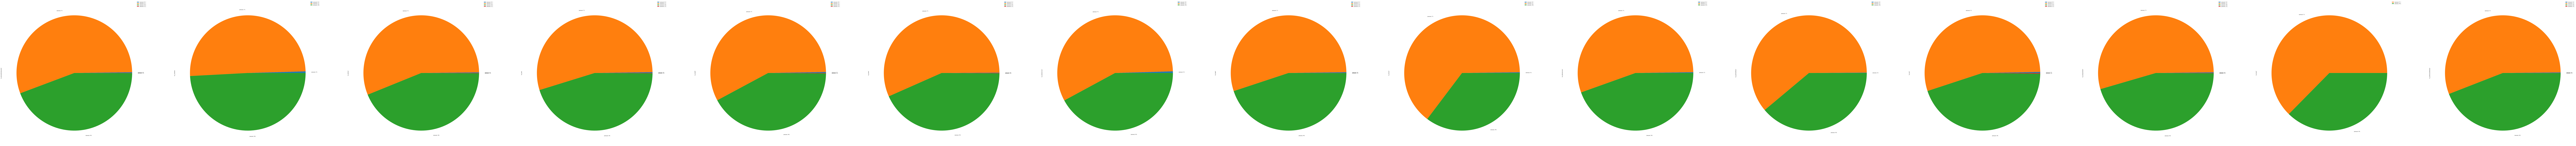

In [401]:
plot = table.T.plot.pie(subplots=True, figsize=(500,100))

In [7]:
selected_list_grouped = transactional_dataset.groupby('step')
selected_list_grouped = selected_list_grouped.agg({'fraud':['sum','count']})
selected_list_grouped

fraud      
       sum count
step            
0       40  2430
1       40  2424
2       40  2462
3       40  2499
4       40  2532
5       40  2525
6       40  2580
7       40  2539
8       40  2575
9       40  2638
10      40  2622
11      40  2636
12      40  2671
13      40  2682
14      40  2723
15      40  2699
16      40  2688
17      40  2709
18      40  2758
19      40  2734
20      40  2761
21      40  2789
22      40  2797
23      40  2797
24      40  2806
25      40  2859
26      40  2886
27      40  2897
28      40  2878
29      40  2883
...    ...   ...
150     40  3718
151     40  3725
152     40  3746
153     40  3663
154     40  3670
155     40  3691
156     40  3713
157     40  3668
158     40  3711
159     40  3688
160     40  3664
161     40  3677
162     40  3716
163     40  3708
164     40  3680
165     40  3707
166     40  3693
167     40  3701
168     40  3700
169     40  3721
170     40  3715
171     40  3716
172     40  3728
173     40  3739
174     40  3743
175     40  3774
176     40  3721
177     40  3758
178     40  3743
179     40  3709

[180 rows x 2 columns]

In [11]:
selected_list_grouped.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
           dtype='int64', name='step', length=180)

In [14]:
selected_list_grouped.columns=('A','B')


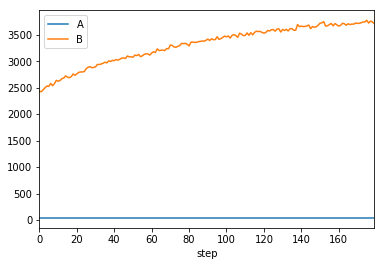

In [15]:
plot = selected_list_grouped.plot()